In [4]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import seaborn as sns # I love this package!
#sns.set_style('white')

import torch

### Loss Trend Check

In [5]:
total_sizes = [200, 500, 1000, 2000, 5000, 10000]
sizes = {}
sizes[200] = [100]
sizes[500] = [100, 200, 300, 400]
sizes[1000] = [200, 400, 600, 800, 900]
sizes[2000] = [500, 1000, 1500, 1900]
sizes[5000] = [3500, 4000, 4500, 4900]
sizes[10000] = [8500, 9000, 9500, 9900]

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, s, added):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for start_labels {s} and Added {added} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(s = str(s), added = str(added), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

In [7]:
total_sizes = [200, 500, 1000, 2000, 5000, 10000]
sizes = {}
sizes[200] = [100]
sizes[500] = [200]
sizes[1000] = [200]
sizes[2000] = [500]
sizes[5000] = [3500]
sizes[10000] = [8500]

In [8]:
aucs = {}
accs = {}

for size in sizes:
    aucs[size] = {}
    accs[size] = {}




-------------------------------------
Showing acc/auc for size = 200
*** loading model from modelbest_100_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:35, 232.60it/s]                                                      


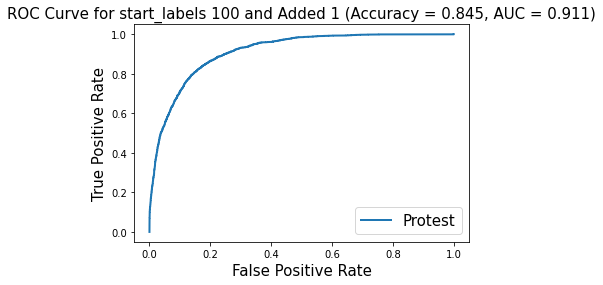

-------------------------------------
Showing acc/auc for size = 500
*** loading model from modelbest_200_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 343.82it/s]                                                      


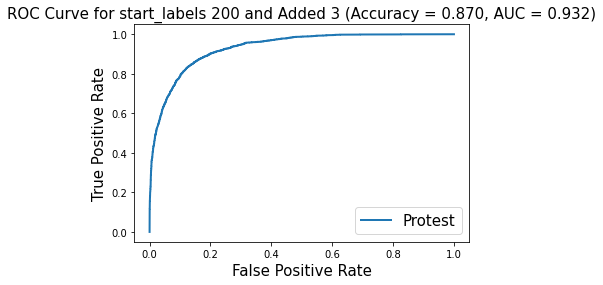

-------------------------------------
Showing acc/auc for size = 1000
*** loading model from modelbest_200_8.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 345.81it/s]                                                      


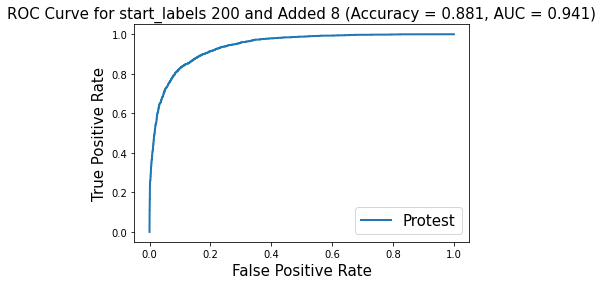

-------------------------------------
Showing acc/auc for size = 2000
*** loading model from modelbest_500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 346.10it/s]                                                      


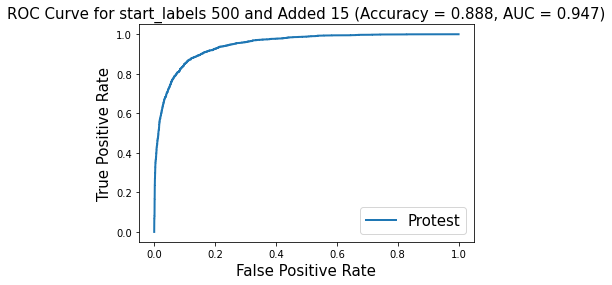

-------------------------------------
Showing acc/auc for size = 5000
*** loading model from modelbest_3500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 339.31it/s]                                                      


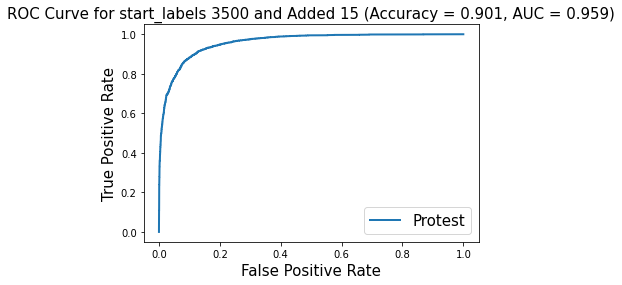

-------------------------------------
Showing acc/auc for size = 10000
*** loading model from modelbest_8500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 344.25it/s]                                                      


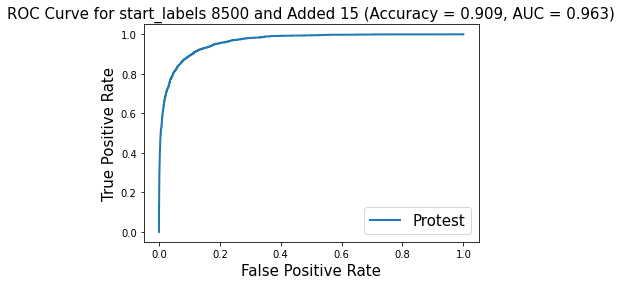

In [9]:
for size in sizes:
    print('-------------------------------------')
    print('Showing acc/auc for size = ' + str(size))
    for s in sizes[size]:
        added = int((size - s) / 100.0)
        model_path = f'modelbest_{s}_{added}.pth.tar'
        # calculate outputs for the test data with our best model
        output_csv_path = 'pred.csv'
        command = ('python pred.py '
                   '--img_dir /UCLA-protest/img/test/ '
                   '--output_csvpath {csv_path} '
                   '--model {model} --batch_size 4 --cuda'
                   .format(csv_path = output_csv_path, model = model_path))


        !{command}

        # load prediction
        df_pred = pd.read_csv(output_csv_path)
        df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

        # load target
        test_label_path = '/UCLA-protest/annot_test.txt'
        df_target = pd.read_csv(test_label_path, delimiter= '\t')
        attr = "protest"
        target = df_target[attr]
        pred = df_pred[attr]
        fig = plot_roc(attr, target, pred, s, added)
        auc = roc_auc_score(target, pred)
        acc = accuracy_score(target, (pred >= 0.5).astype(int))
        aucs[size]['protest'] = auc 
        accs[size]['protest'] = acc 
        
        for attr in df_pred.columns[3:]:
            target = df_target[attr]
            pred = df_pred[attr][target != '-']
            target = target[target != '-'].astype(int)
            #fig = plot_roc(attr, target, pred)
            auc = roc_auc_score(target, pred)
            acc = accuracy_score(target, (pred >= 0.5).astype(int))
            aucs[size][attr] = auc
            accs[size][attr] = acc

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, sample_size):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for Sample Size {sample_size} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(sample_size = str(sample_size), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

*** loading model from ../learning-curve/modelbest_200.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 345.60it/s]                                                      


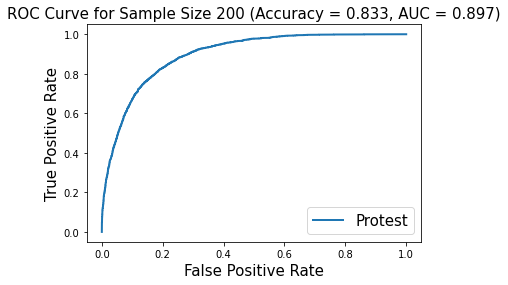

*** loading model from ../learning-curve/modelbest_500.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 343.19it/s]                                                      


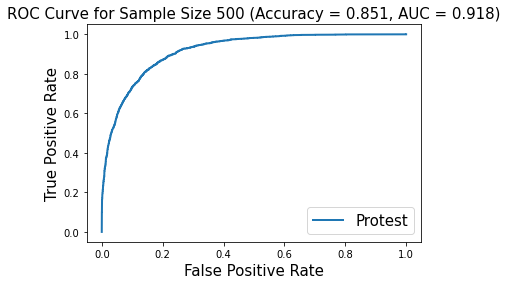

*** loading model from ../learning-curve/modelbest_1000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 346.58it/s]                                                      


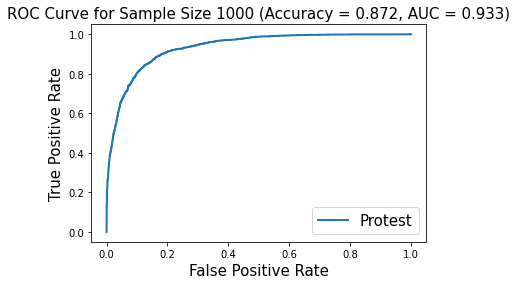

*** loading model from ../learning-curve/modelbest_2000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 345.85it/s]                                                      


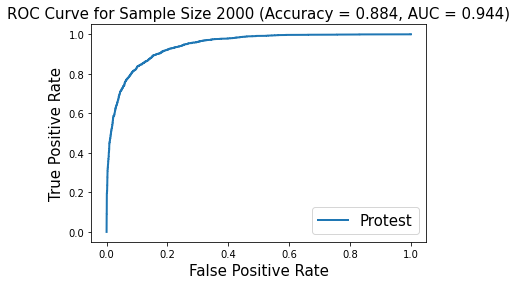

*** loading model from ../learning-curve/modelbest_5000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 344.77it/s]                                                      


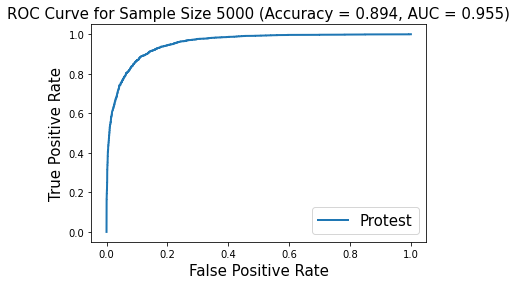

*** loading model from ../learning-curve/modelbest_10000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:23, 344.52it/s]                                                      


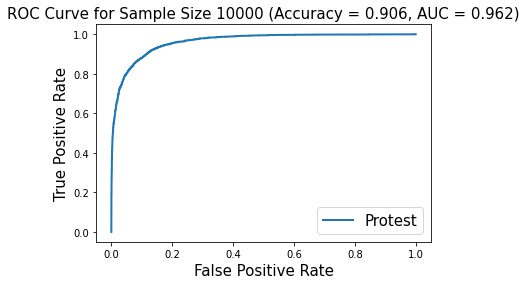

In [25]:
sample_sizes = [200, 500, 1000, 2000, 5000, 10000]
auc_scores_lr = {}
acc_scores_lr = {}
for attr in df_pred.columns[1:]:
    if attr != 'violence':
        auc_scores_lr[attr] = []
        acc_scores_lr[attr] = []

for s in sample_sizes:
    model_path = f'../learning-curve/modelbest_{s}.pth.tar'
    # calculate outputs for the test data with our best model
    output_csv_path = 'pred.csv'
    command = ('python pred.py '
               '--img_dir /UCLA-protest/img/test/ '
               '--output_csvpath {csv_path} '
               '--model {model} --batch_size 4 --cuda'
               .format(csv_path = output_csv_path, model = model_path))


    !{command}

    # load prediction
    df_pred = pd.read_csv(output_csv_path)
    df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

    # load target
    test_label_path = '/UCLA-protest/annot_test.txt'
    df_target = pd.read_csv(test_label_path, delimiter= '\t')
    attr = "protest"
    target = df_target[attr]
    pred = df_pred[attr]
    fig = plot_roc(attr, target, pred, s)
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    auc_scores_lr["protest"].append(auc)
    acc_scores_lr["protest"].append(acc)
    for attr in df_pred.columns[3:]:
            target = df_target[attr]
            pred = df_pred[attr][target != '-']
            target = target[target != '-'].astype(int)
            #fig = plot_roc(attr, target, pred)
            auc = roc_auc_score(target, pred)
            acc = accuracy_score(target, (pred >= 0.5).astype(int))
            auc_scores_lr[attr].append(auc)
            acc_scores_lr[attr].append(acc)
    

In [10]:
best_aucs = {}
best_accs = {}

for attr in df_pred.columns[1:]:
    if attr != 'violence':
        best_aucs[attr] = []
        best_accs[attr] = []
    
for size in sizes:
    for attr in best_aucs.keys():
        best_aucs[attr].append(aucs[size][attr])
        best_accs[attr].append(accs[size][attr])

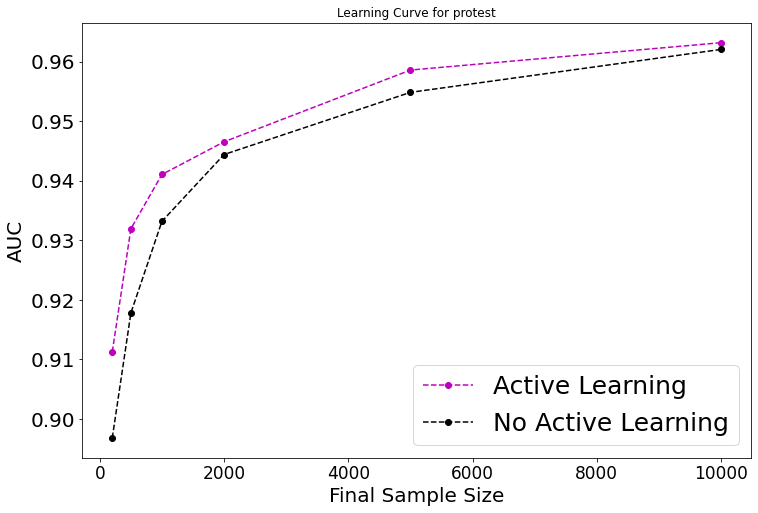

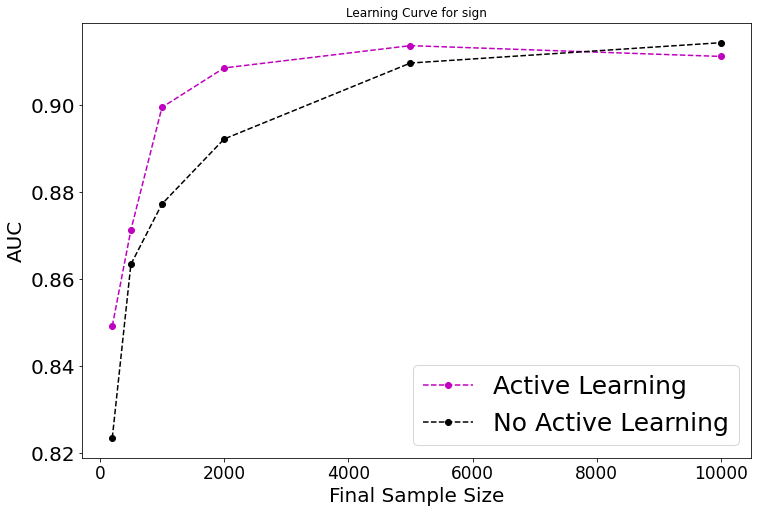

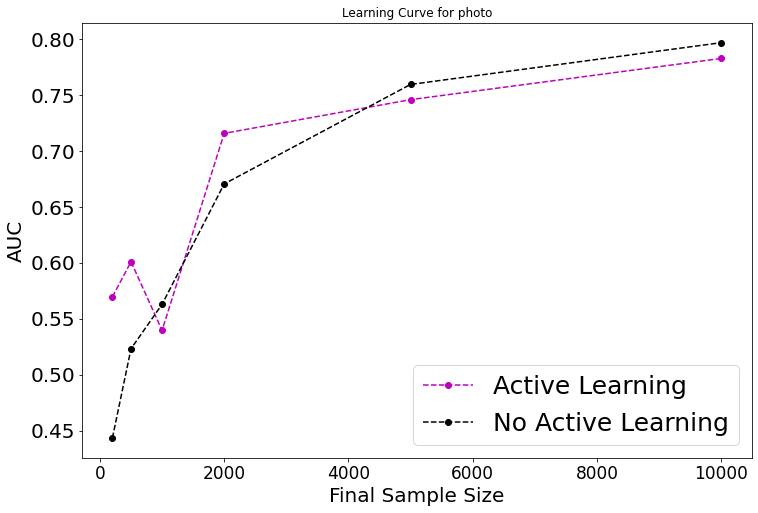

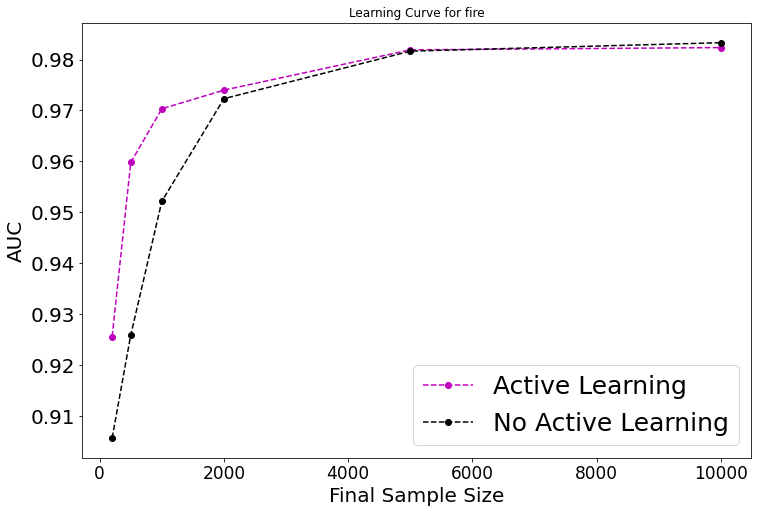

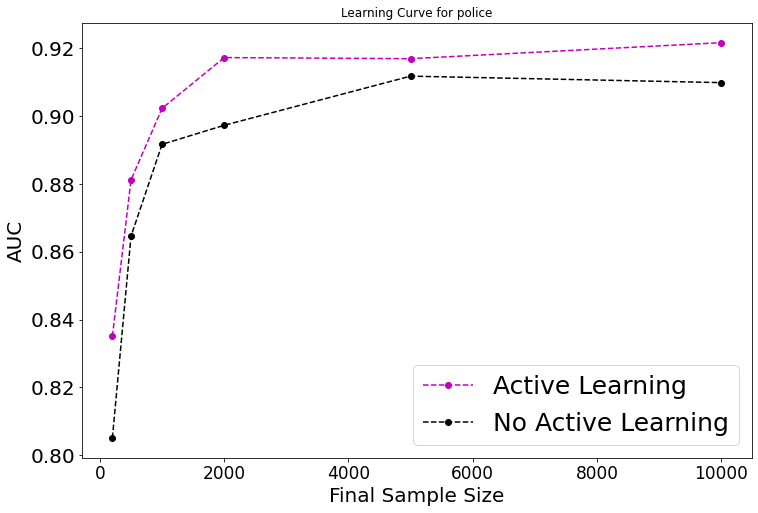

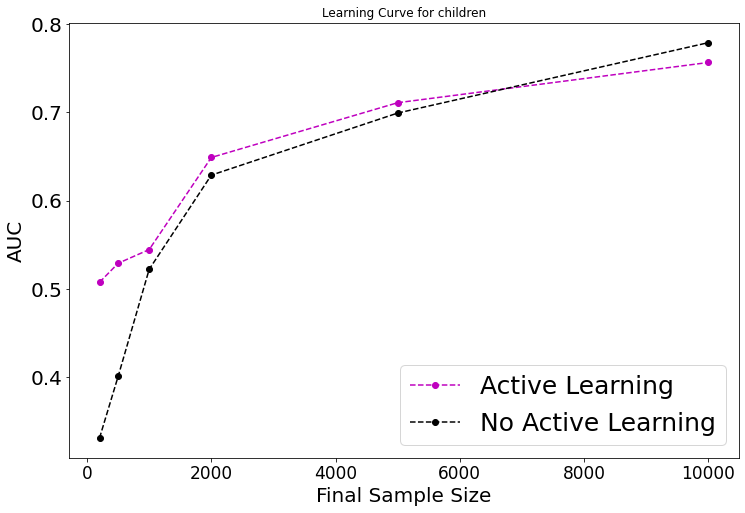

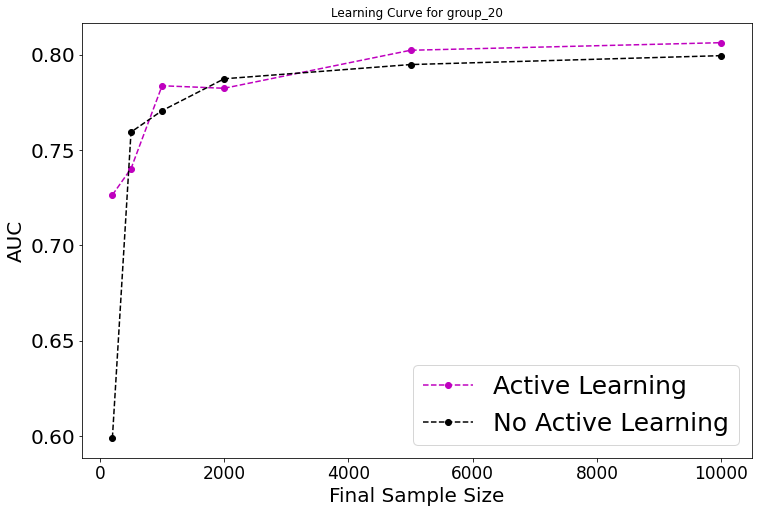

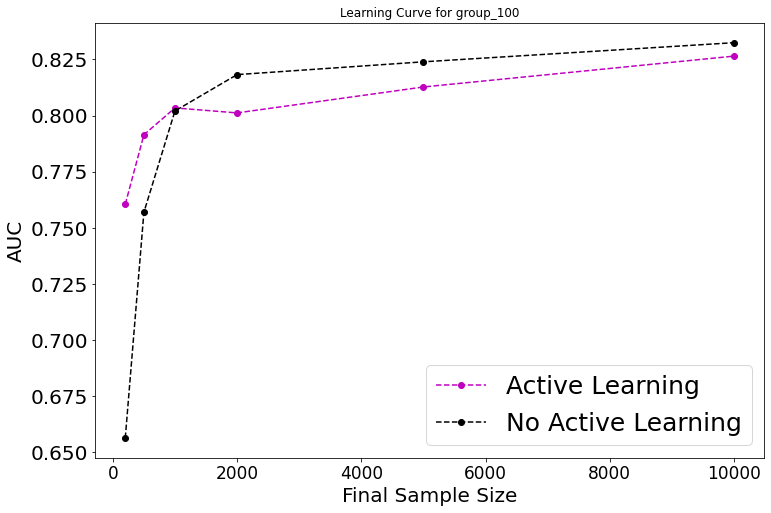

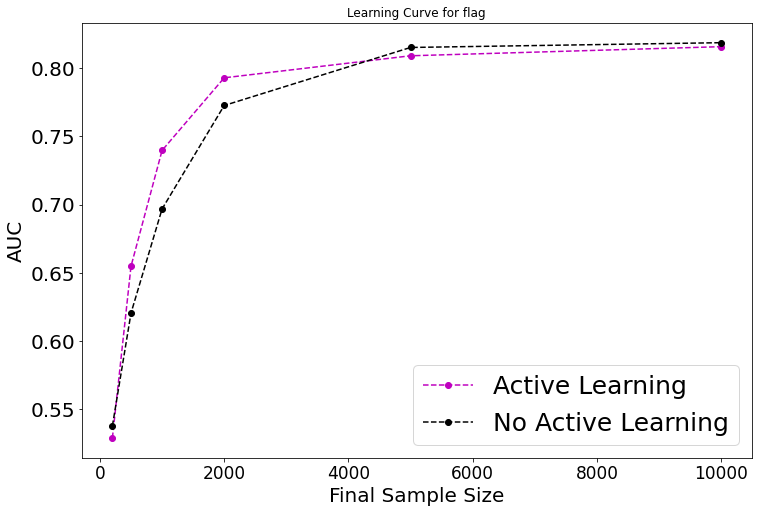

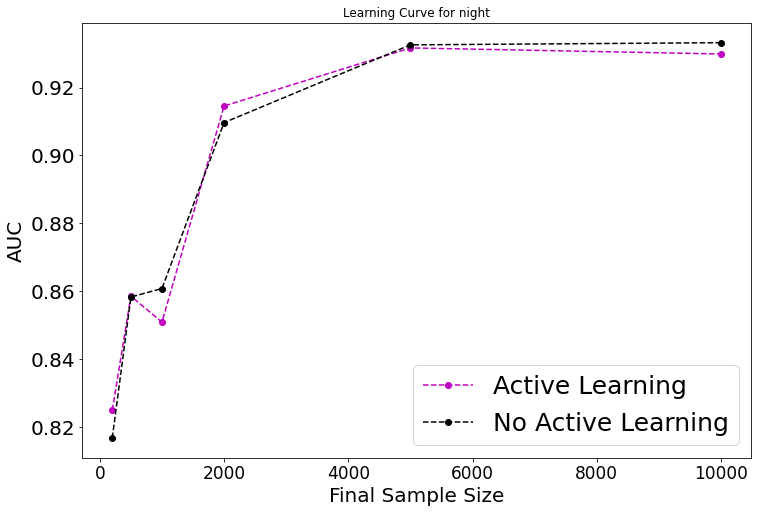

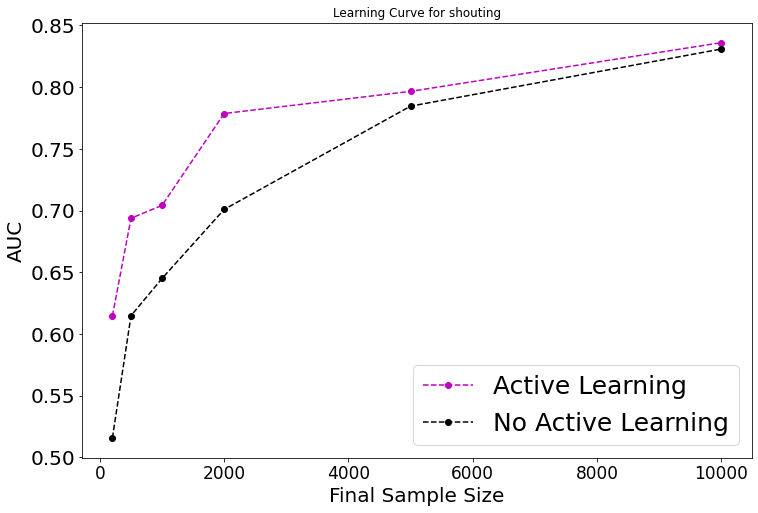

In [36]:
for attr in best_aucs.keys():
    plt.figure(figsize=(12,8))
    plt.plot(list(sizes.keys()), best_aucs[attr],'mo--', label='Active Learning')
    plt.plot(list(sizes.keys()), auc_scores_lr[attr], 'ko--', label = 'No Active Learning')
    plt.ylabel('AUC', fontsize=20)
    plt.xlabel('Final Sample Size', fontsize=20)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize=20)
    plt.title('Learning Curve for ' + attr)
    plt.show()



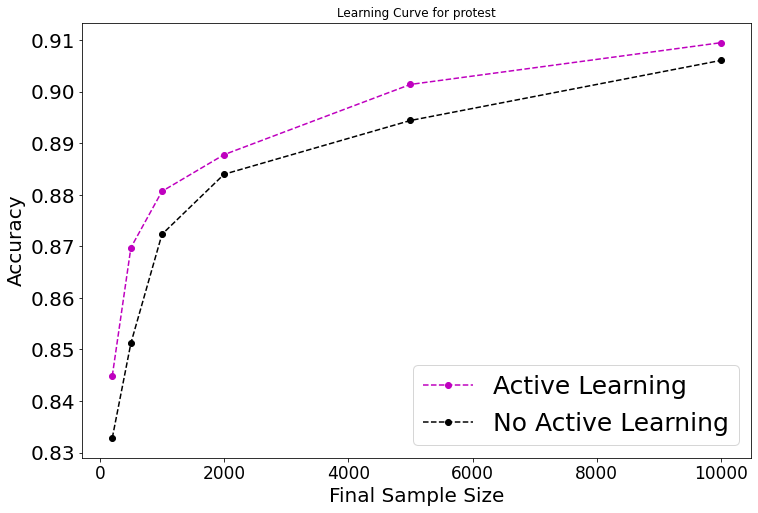

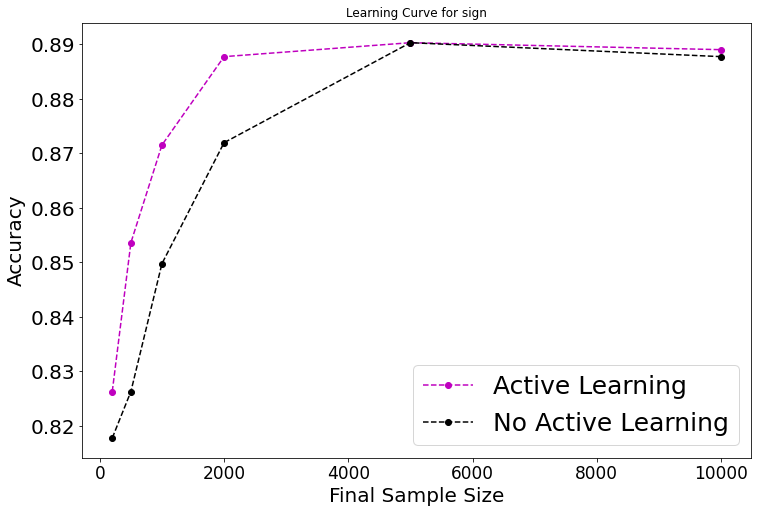

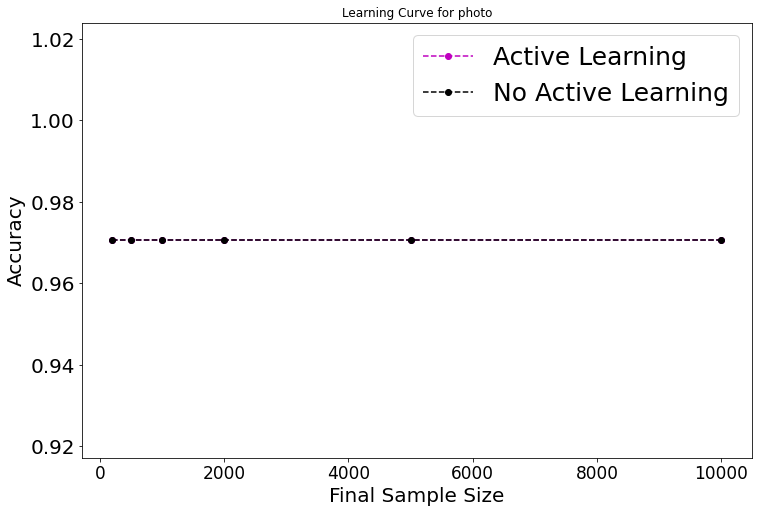

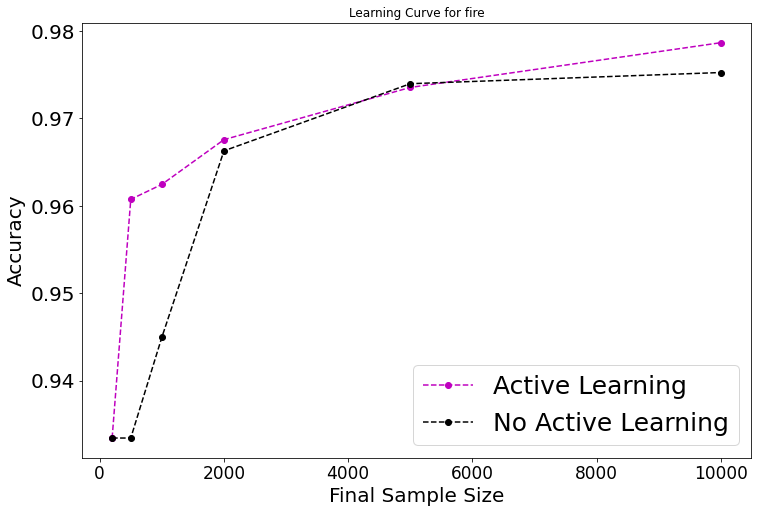

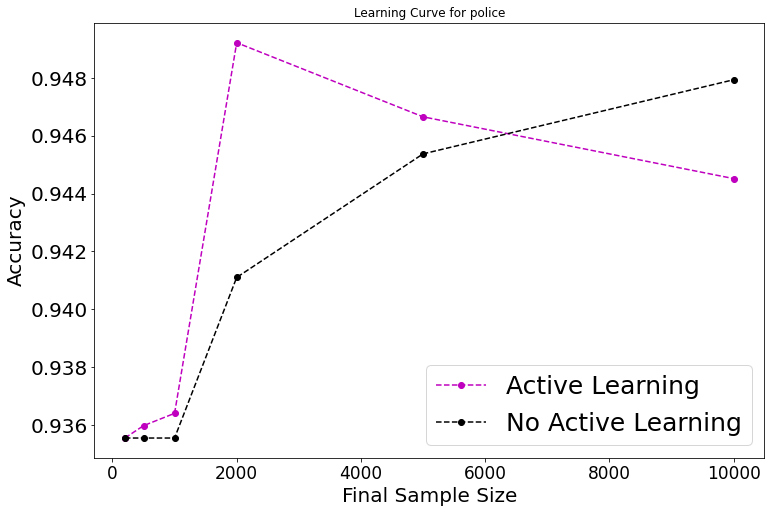

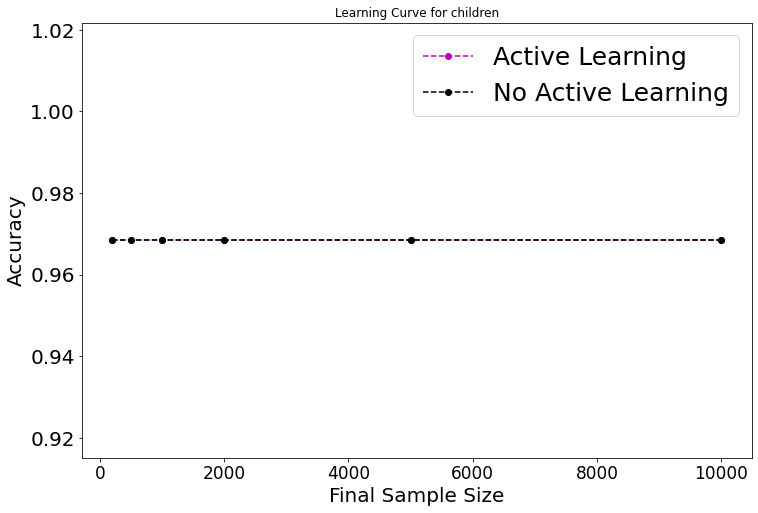

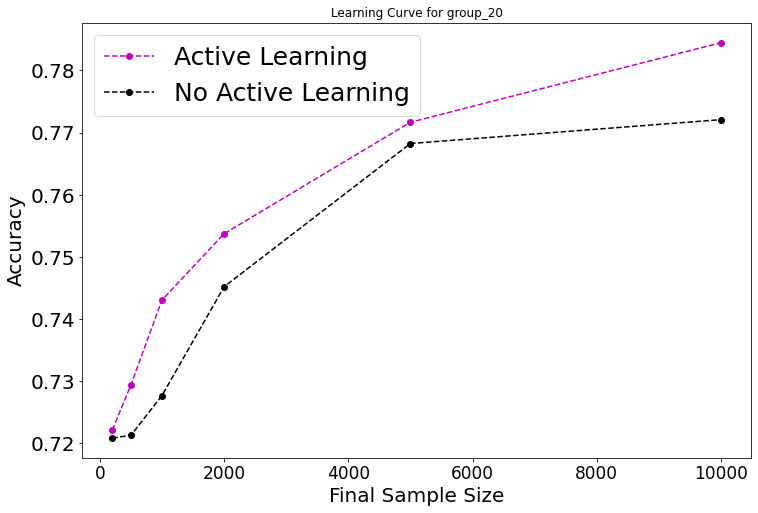

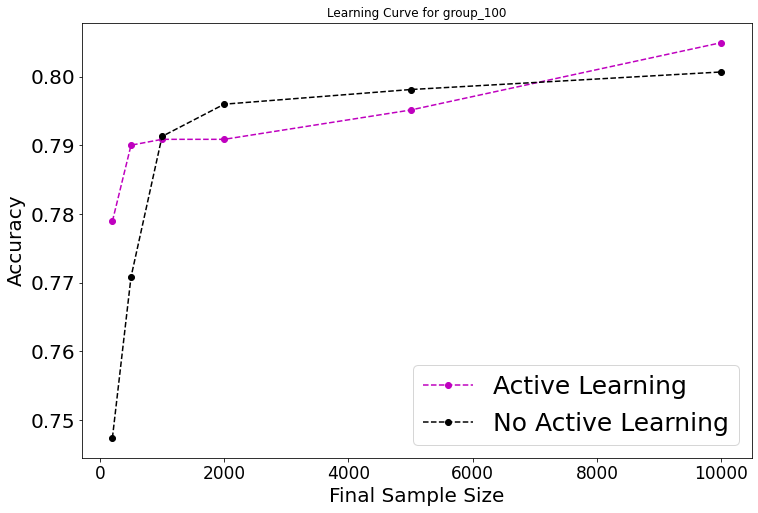

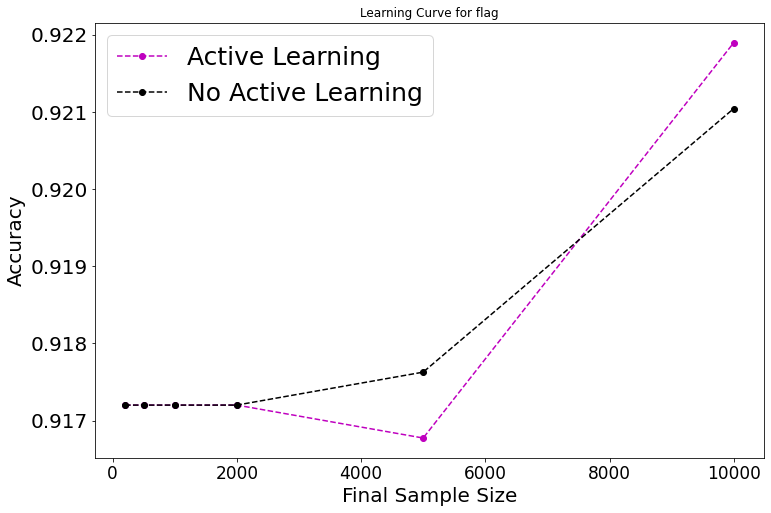

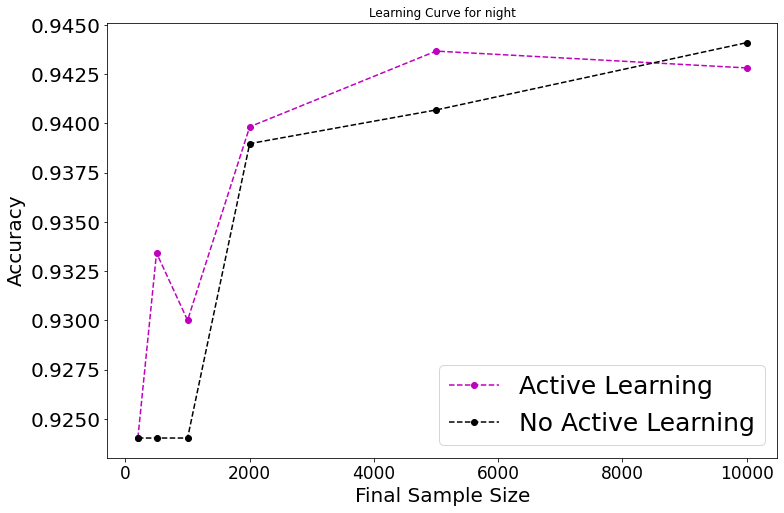

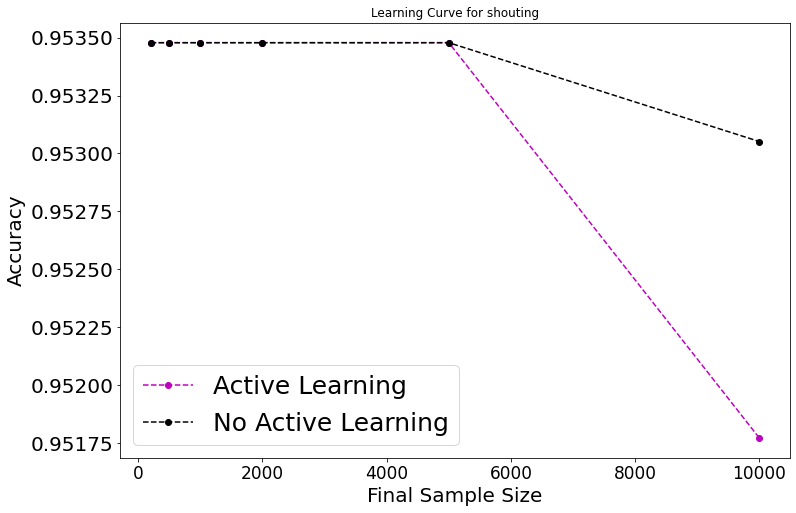

In [37]:
for attr in best_accs.keys():
    plt.figure(figsize=(12,8))
    plt.plot(list(sizes.keys()), best_accs[attr],'mo--', label='Active Learning')
    plt.plot(list(sizes.keys()), acc_scores_lr[attr], 'ko--', label = 'No Active Learning')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Final Sample Size', fontsize=20)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize=20)
    plt.title('Learning Curve for ' + attr)
    plt.show()

In [8]:
print(best_starting_size_auc)
print(best_starting_size_acc)

[100, 200, 200, 1000, 3500, 8500]
[100, 200, 200, 500, 3500, 8500]


In [9]:
best_aucs

[0.911249,
 0.9319388767802138,
 0.9410489956900954,
 0.9472198653770009,
 0.9585762108246411,
 0.9631750341405866]

In [10]:
best_accs

[0.844842,
 0.8697411995584448,
 0.880657426714093,
 0.8877713725009199,
 0.9013859928860543,
 0.9094811725745124]

In [11]:
learning_curve_aucs = [0.896791, 0.917798, 0.933183, 0.944396, 0.954834, 0.962044]
learning_curve_accs = [0.832822, 0.851220, 0.872317, 0.883969, 0.894395, 0.906047]

In [12]:
learning_curve_aucs

[0.896791, 0.917798, 0.933183, 0.944396, 0.954834, 0.962044]

In [14]:
best_aucs['protest']

[0.9112486529252184,
 0.9319389135102693,
 0.9410489956900954,
 0.9465333071815338,
 0.9585762108246411,
 0.9631750341405866]

In [21]:
auc_improvement = np.array(best_aucs['protest']) - np.array(learning_curve_aucs)
acc_improvement = np.array(best_accs['protest']) - np.array(learning_curve_accs)

In [62]:
import pandas as pd
pd.DataFrame.plot.bar(x=['86%', '88%', '90%'], y=active_learning)

TypeError: bar() missing 1 required positional argument: 'self'

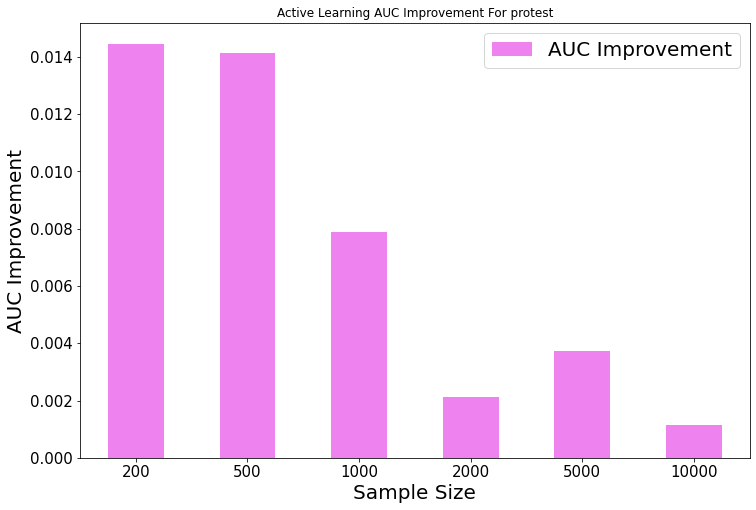

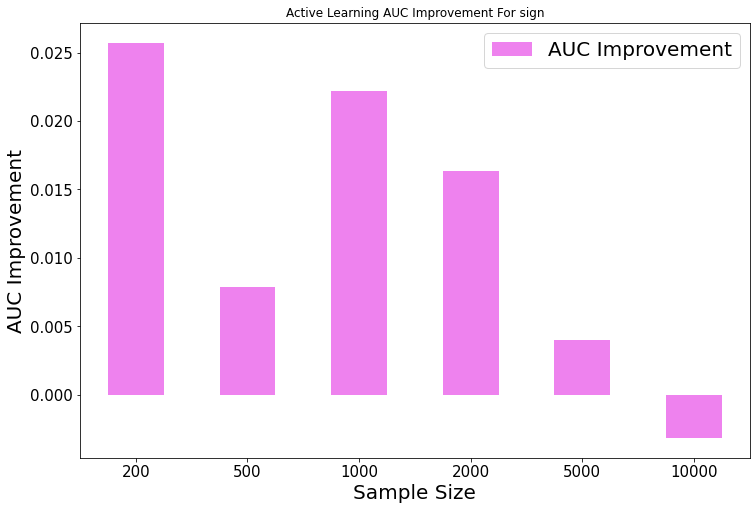

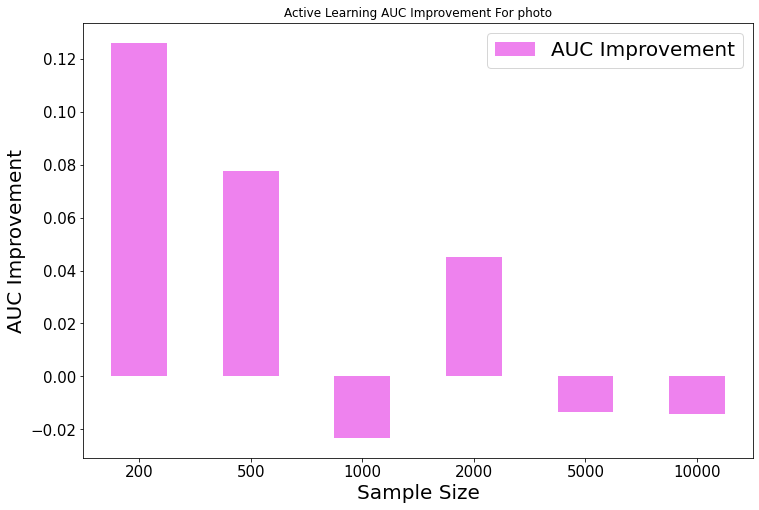

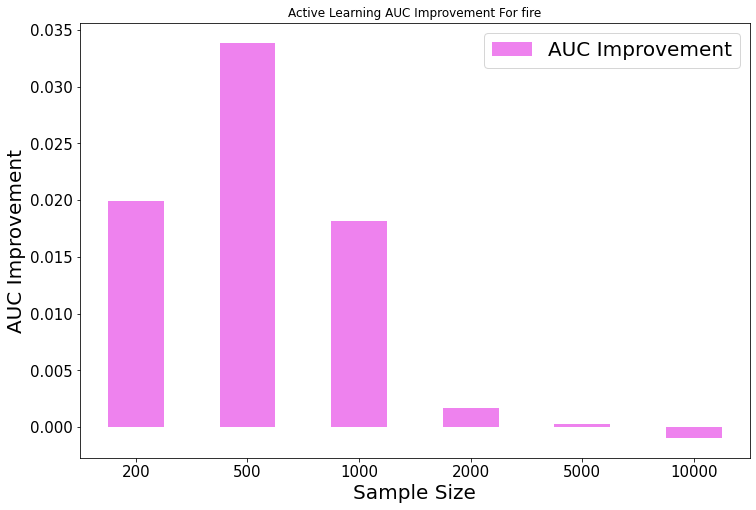

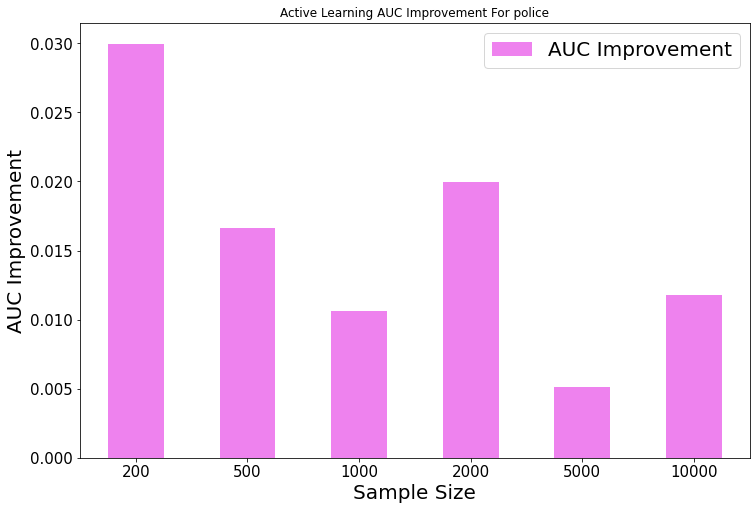

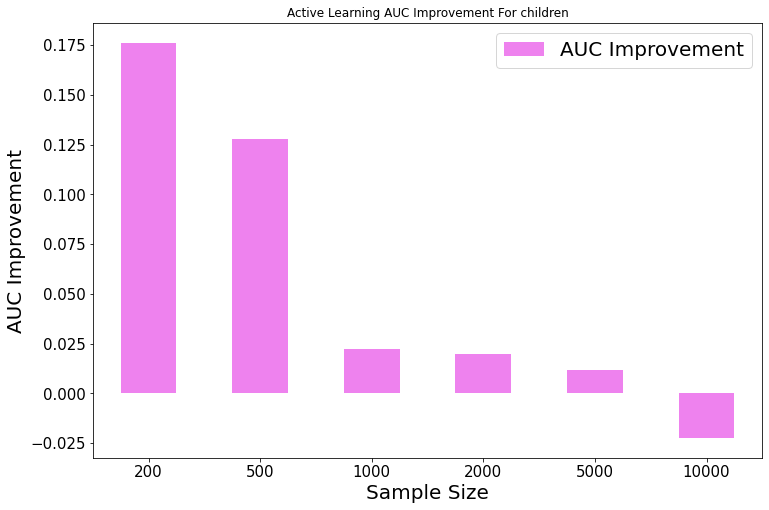

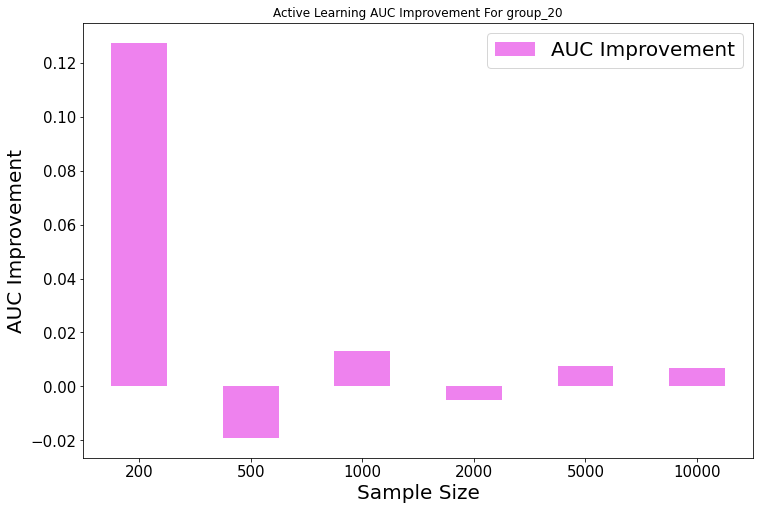

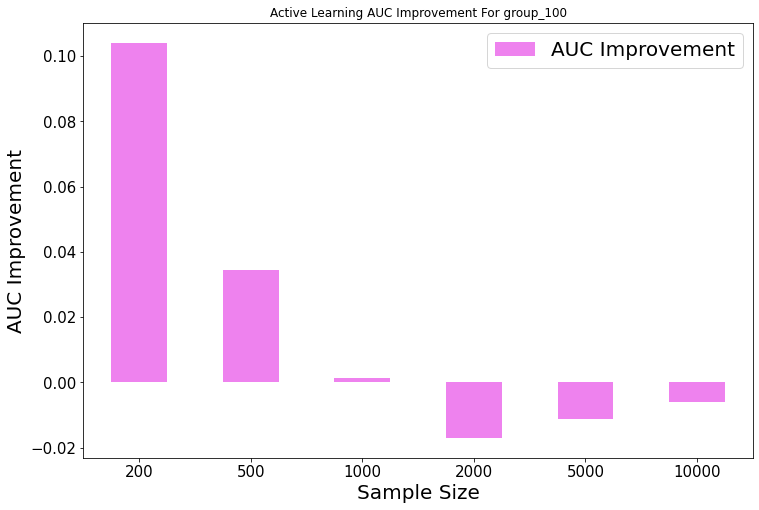

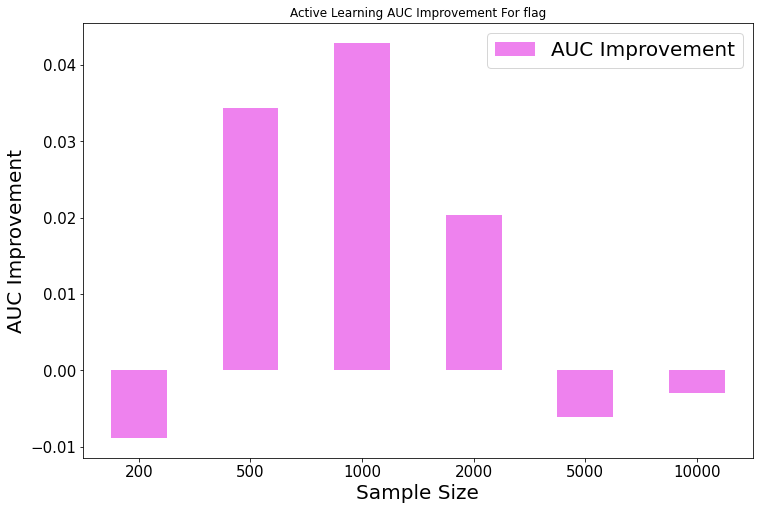

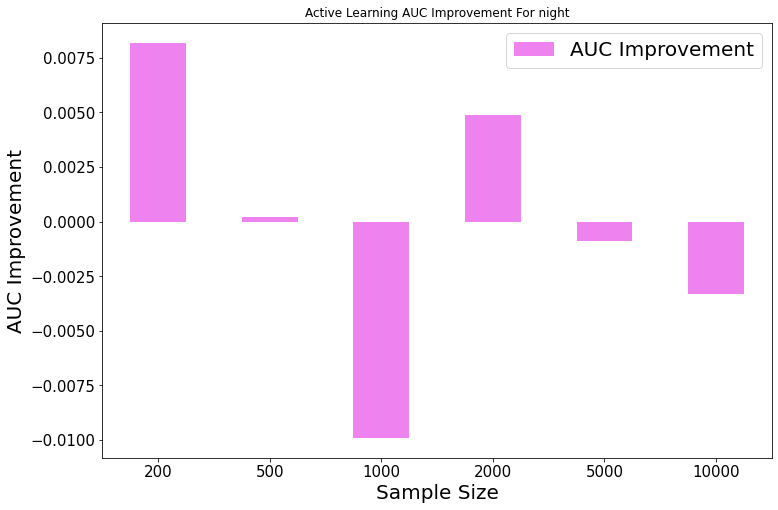

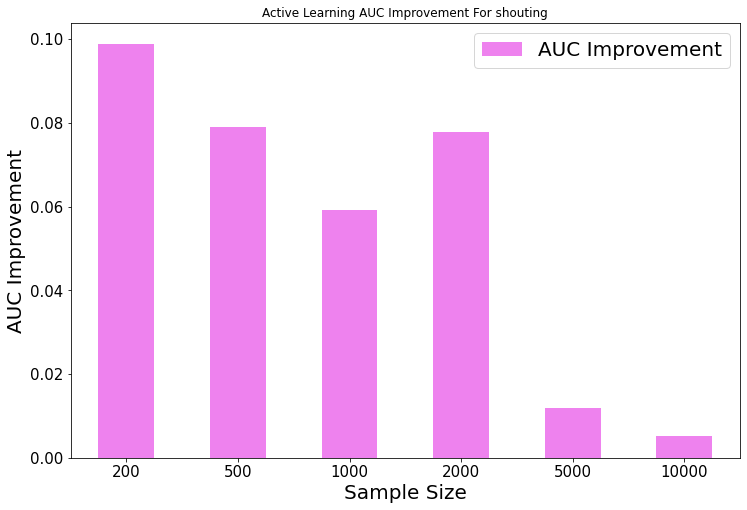

In [26]:
for attr in best_aucs.keys():
    auc_improvement = np.array(best_aucs[attr]) - np.array(auc_scores_lr[attr])
    index = list(sizes.keys())
    df = pd.DataFrame({'AUC Improvement': auc_improvement}, index=index)
    ax = df.plot.bar(rot=0, color={"AUC Improvement": "violet"}, fontsize=15, figsize=(12,8))
    ax.set_xlabel('Sample Size', fontsize=20)
    ax.set_ylabel('AUC Improvement', fontsize=20)
    ax.set_title('Active Learning AUC Improvement For ' + attr)
    ax.legend(fontsize=20)
    plt.show()

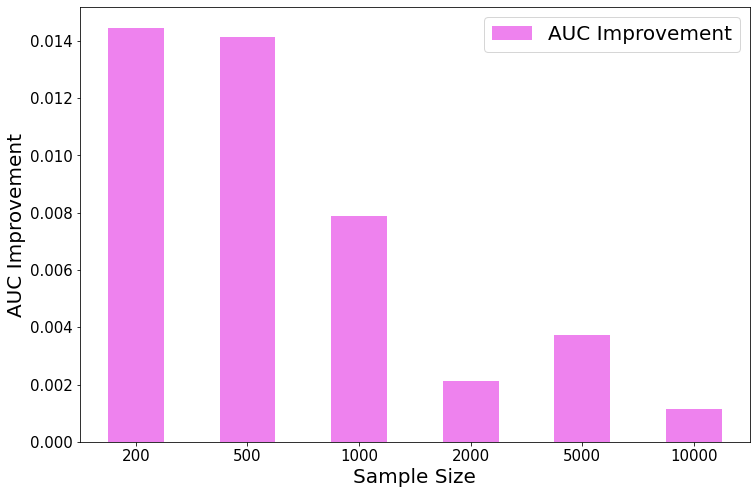

In [20]:
import pandas as pd

# active_learning = [500, 1000, 5000]
# no_active_learning = [750, 2000, 7500]

index = ['86%', '88%', '90%']
index = list(sizes.keys())
df = pd.DataFrame({'AUC Improvement': auc_improvement}, index=index)

ax = df.plot.bar(rot=0, color={"AUC Improvement": "violet"}, fontsize=15, figsize=(12,8))
ax.set_xlabel('Sample Size', fontsize=20)
ax.set_ylabel('AUC Improvement', fontsize=20)
ax.legend(fontsize=20)

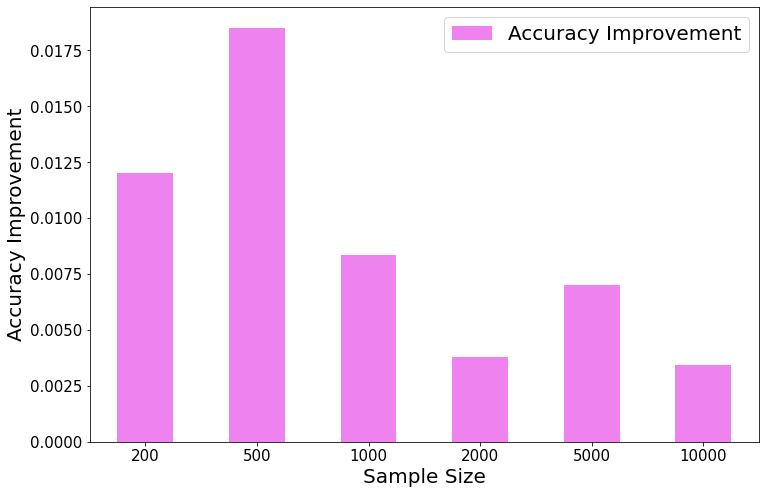

In [22]:
import pandas as pd

# active_learning = [500, 1000, 5000]
# no_active_learning = [750, 2000, 7500]

index = list(sizes.keys())
df = pd.DataFrame({'Accuracy Improvement': acc_improvement}, index=index)

ax = df.plot.bar(rot=0, color={"Accuracy Improvement": "violet"}, fontsize=15, figsize=(12,8))
ax.set_xlabel('Sample Size', fontsize=20)
ax.set_ylabel('Accuracy Improvement', fontsize=20)
ax.legend(fontsize=20)

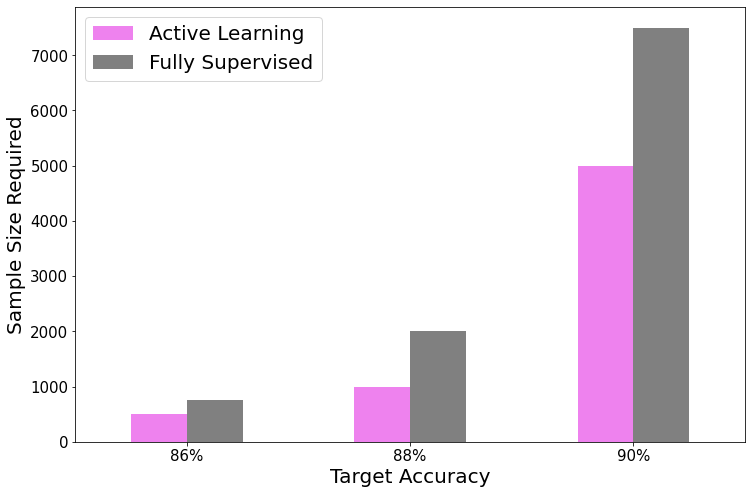

In [78]:
import pandas as pd

active_learning = [500, 1000, 5000]
no_active_learning = [750, 2000, 7500]
index = ['86%', '88%', '90%']
df = pd.DataFrame({'Active Learning': active_learning,
                    'Fully Supervised': no_active_learning}, index=index)

ax = df.plot.bar(rot=0, color={"Active Learning": "violet", "Fully Supervised": "gray"}, fontsize=15, figsize=(12,8))
ax.set_xlabel('Target Accuracy', fontsize=20)
ax.set_ylabel('Sample Size Required', fontsize=20)
ax.legend(fontsize=20)

<ipython-input-60-3227cce588bc>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

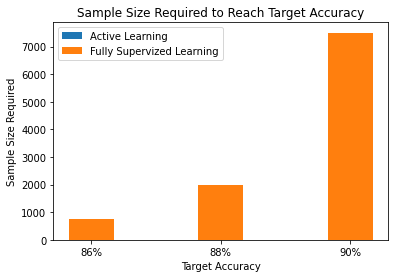

In [60]:
labels = ['86%', '88%', '90%']
x = ['86%', '88%', '90%']
active_learning = [500, 1000, 5000]
no_active_learning = [750, 2000, 7500]

#x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, active_learning, width, label='Active Learning')
rects2 = ax.bar(x, no_active_learning, width, label='Fully Supervized Learning')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Size Required')
ax.set_title('Sample Size Required to Reach Target Accuracy')
ax.set_xticks(x, labels)
ax.set_xlabel('Target Accuracy')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [30]:
xs = [200]+list(sizes.keys())
ys = np.array(best_aucs)

In [23]:
(np.array(best_aucs) - np.array(learning_curve_aucs)) / np.array(learning_curve_aucs)

array([0.01612193, 0.0154074 , 0.00842921, 0.00299013, 0.00391923,
       0.00117566])

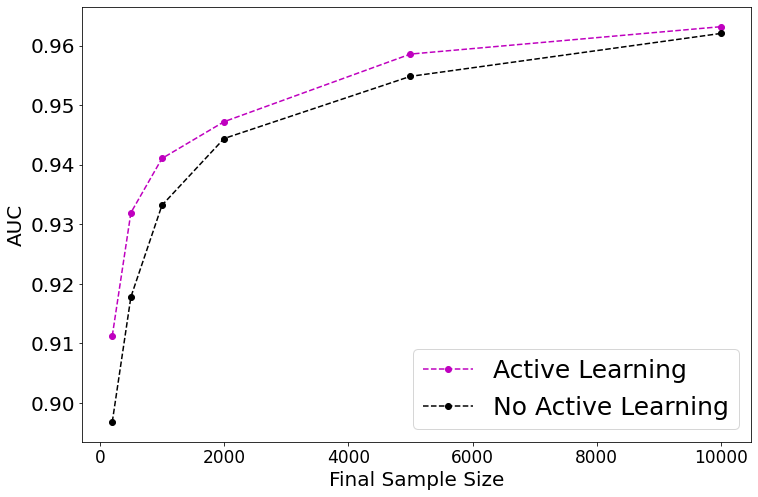

In [80]:
plt.figure(figsize=(12,8))
plt.plot([200]+list(sizes.keys()), best_aucs,'mo--', label='Active Learning')
plt.plot([200]+list(sizes.keys()), learning_curve_aucs, 'ko--', label = 'No Active Learning')
plt.ylabel('AUC', fontsize=20)
plt.xlabel('Final Sample Size', fontsize=20)
plt.legend(fontsize=25)
plt.xticks(fontsize = 17)
plt.yticks(fontsize=20)
plt.show()

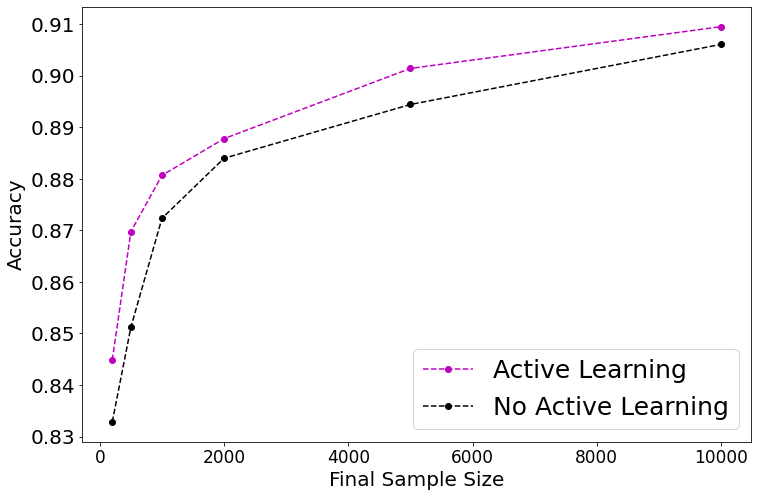

In [81]:
plt.figure(figsize=(12,8))
plt.plot([200]+list(sizes.keys()), best_accs,'mo--', label='Active Learning')
plt.plot([200]+list(sizes.keys()), learning_curve_accs, 'ko--', label = 'No Active Learning')
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Final Sample Size', fontsize=20)
plt.legend(fontsize=25)
plt.xticks(fontsize = 17)
plt.yticks(fontsize=20)
plt.show()

### Model performance

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, heuristic, method):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for Heuristic {heuristic} and Method {method} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(heuristic = str(heuristic), method = str(method), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

In [5]:
auc_scores = np.zeros((4,5))
acc_scores = np.zeros((4,5))

*** loading model from modelbest_0_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.50it/s]                                                      


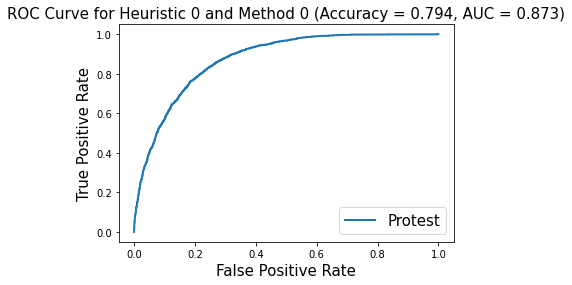

*** loading model from modelbest_1_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.61it/s]                                                      


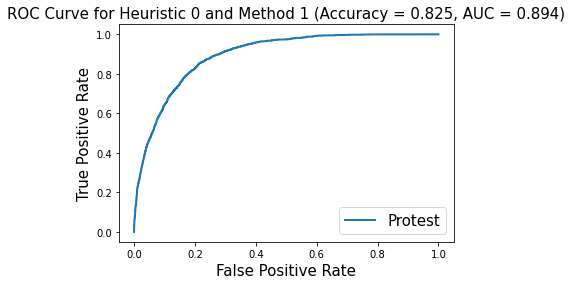

*** loading model from modelbest_2_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.64it/s]                                                      


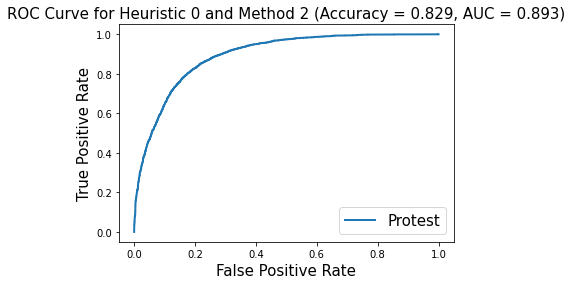

*** loading model from modelbest_3_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.05it/s]                                                      


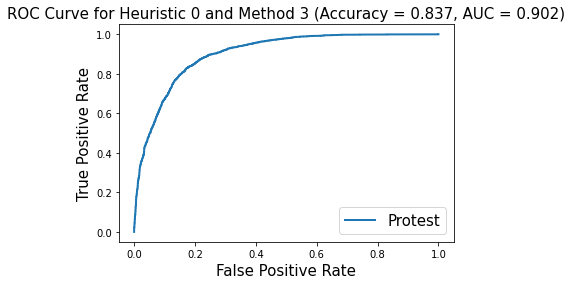

*** loading model from modelbest_4_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.45it/s]                                                      


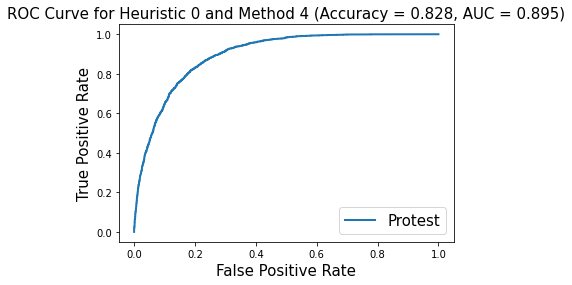

*** loading model from modelbest_0_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.89it/s]                                                      


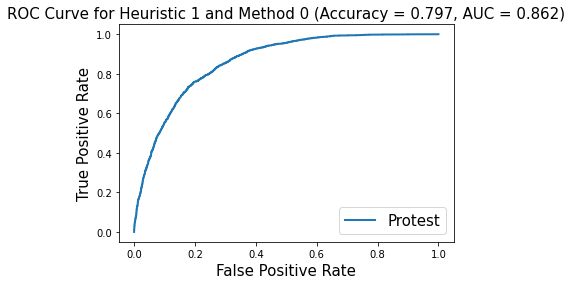

*** loading model from modelbest_1_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.54it/s]                                                      


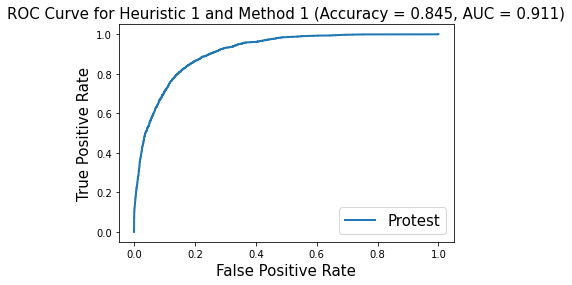

*** loading model from modelbest_2_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.06it/s]                                                      


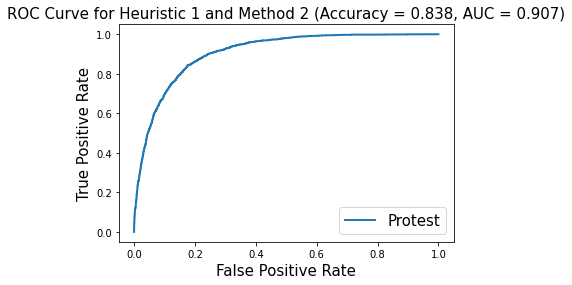

*** loading model from modelbest_3_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 334.44it/s]                                                      


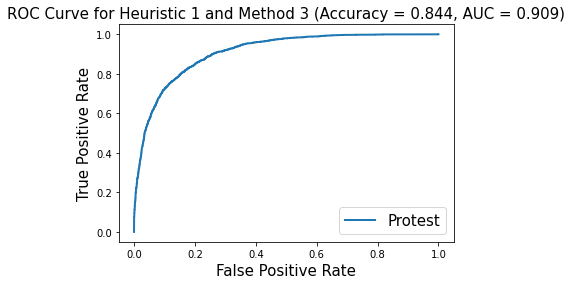

*** loading model from modelbest_4_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 339.82it/s]                                                      


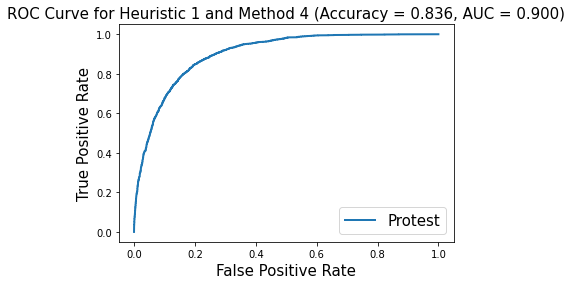

*** loading model from modelbest_0_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.11it/s]                                                      


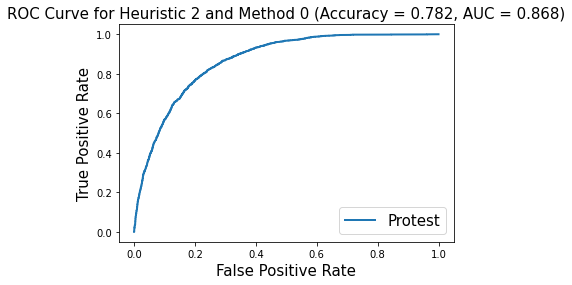

*** loading model from modelbest_1_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.54it/s]                                                      


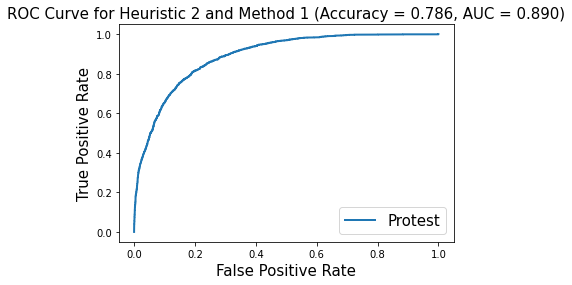

*** loading model from modelbest_2_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.91it/s]                                                      


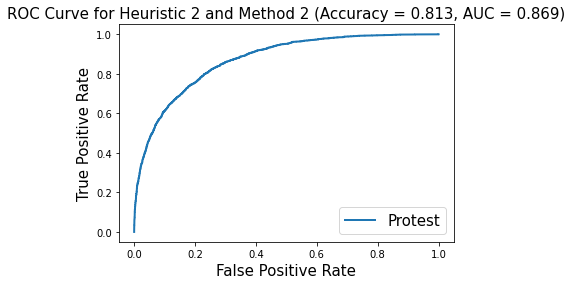

*** loading model from modelbest_3_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 333.30it/s]                                                      


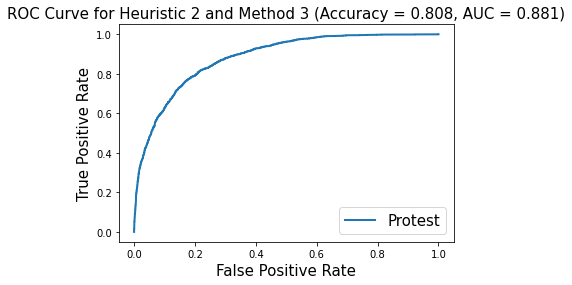

*** loading model from modelbest_4_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.05it/s]                                                      


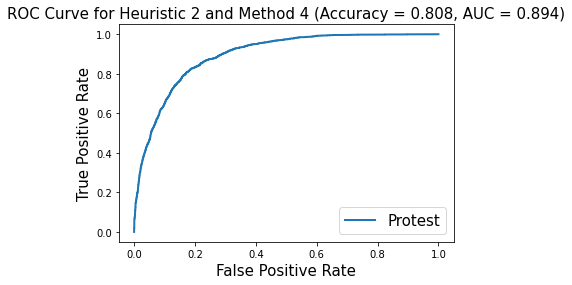

*** loading model from modelbest_0_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 334.77it/s]                                                      


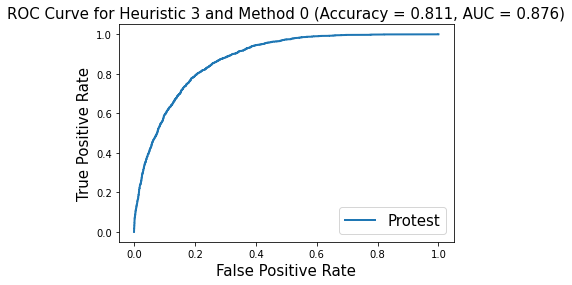

*** loading model from modelbest_1_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.53it/s]                                                      


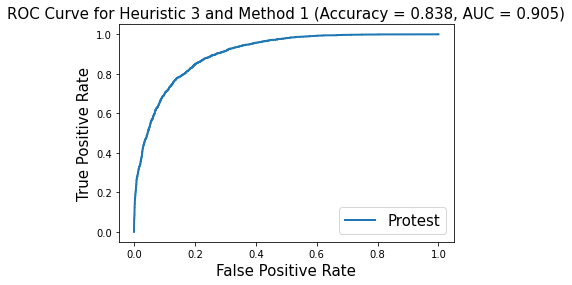

*** loading model from modelbest_2_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.31it/s]                                                      


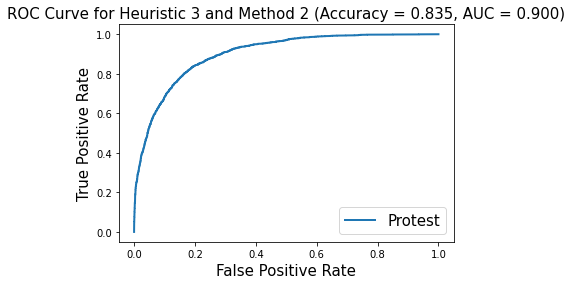

*** loading model from modelbest_3_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.59it/s]                                                      


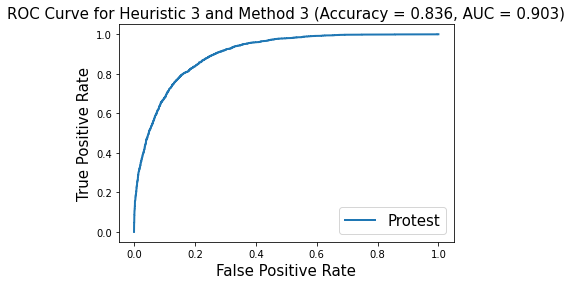

*** loading model from modelbest_4_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.48it/s]                                                      


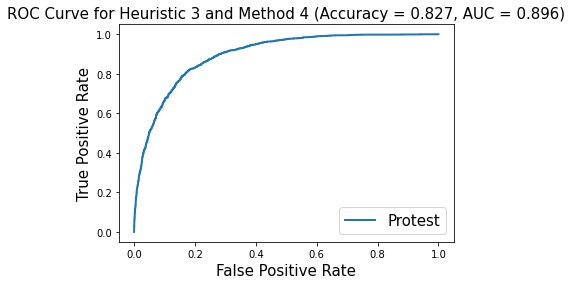

In [6]:
for i in range(4):
    for j in range(5):
        model_path = f'modelbest_{j}_{i}.pth.tar'
        # calculate outputs for the test data with our best model
        output_csv_path = 'pred.csv'
        command = ('python pred.py '
                   '--img_dir /UCLA-protest/img/test/ '
                   '--output_csvpath {csv_path} '
                   '--model {model} --batch_size 4 --cuda'
                   .format(csv_path = output_csv_path, model = model_path))


        !{command}

        # load prediction
        df_pred = pd.read_csv(output_csv_path)
        df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

        # load target
        test_label_path = '/UCLA-protest/annot_test.txt'
        df_target = pd.read_csv(test_label_path, delimiter= '\t')
        attr = "protest"
        target = df_target[attr]
        pred = df_pred[attr]
        fig = plot_roc(attr, target, pred, i, j)
        auc = roc_auc_score(target, pred)
        acc = accuracy_score(target, (pred >= 0.5).astype(int))
        auc_scores[i, j] = auc
        acc_scores[i, j] = acc

In [7]:
pd.DataFrame(auc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.872856  0.893963  0.892657  0.901981  0.895422
Heuristic_1  0.861500  0.911249  0.906539  0.908655  0.900348
Heuristic_2  0.867548  0.890060  0.869449  0.881321  0.894302
Heuristic_3  0.876275  0.904760  0.899938  0.902661  0.895758

In [8]:
pd.DataFrame(auc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.872856  0.893963  0.892657  0.901981  0.895422
Heuristic_1  0.861500  0.911249  0.906539  0.908655  0.900348
Heuristic_2  0.867548  0.890060  0.869449  0.881321  0.894302
Heuristic_3  0.876275  0.904760  0.899938  0.902661  0.895758

In [9]:
pd.DataFrame(acc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.794309  0.825463  0.828775  0.836993  0.828284
Heuristic_1  0.797375  0.844842  0.837606  0.843739  0.835521
Heuristic_2  0.782289  0.785600  0.813075  0.807678  0.808414
Heuristic_3  0.811235  0.837606  0.834785  0.836134  0.826690

In [8]:
model_path = 'modelbest_1_2.pth.tar'
# calculate outputs for the test data with our best model
output_csv_path = 'pred.csv'
command = ('python pred.py '
           '--img_dir /UCLA-protest/img/test/ '
           '--output_csvpath {csv_path} '
           '--model {model} --batch_size 4 --cuda'
           .format(csv_path = output_csv_path, model = model_path))

            
!{command}

# load prediction
df_pred = pd.read_csv(output_csv_path)
df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

# load target
test_label_path = '/UCLA-protest/annot_test.txt'
df_target = pd.read_csv(test_label_path, delimiter= '\t')

*** loading model from modelbest_1_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:27, 301.47it/s]                                                      


In [7]:
#python pred.py --img_dir /UCLA-protest/img/test/ --output_csvpath pred.csv --model model_best.pth.tar --batch_size 4 --cuda
torch.load('modelbest_2_2.pth.tar')

{'epoch': 125,
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.4835e-02,  1.5322e-02, -1.5000e-02,  ..., -4.0598e-02,
                          -4.2850e-02, -7.0115e-02],
                         [ 4.9964e-03,  6.2835e-03,  1.5409e-02,  ...,  2.4640e-03,
                          -2.0846e-02, -3.8135e-02],
                         [ 2.3462e-02,  2.4313e-02,  1.6711e-02,  ...,  1.0333e-01,
                           6.2703e-02,  5.2612e-02],
                         ...,
                         [ 1.2722e-03,  2.9218e-02, -8.7822e-03,  ..., -1.2638e-01,
                          -7.6547e-02,  8.1309e-03],
                         [ 5.6003e-03,  4.9355e-02,  6.3294e-02,  ...,  2.4893e-02,
                          -3.3869e-02, -1.5672e-02],
                         [-7.8150e-02, -3.0570e-02, -1.6797e-02,  ...,  3.5997e-02,
                           2.2178e-02,  1.1303e-03]],
               
                        [[-1.6690e-02,  1.2320e-02,  2.4721e-02,  ..., 

#### Binary Variables

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

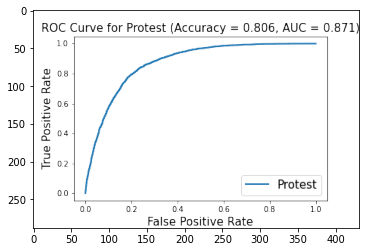

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/home/ac8839/1006_Capstone_Project/src/won-et-al/files/protest.png', 'r')
imshow(np.asarray(pil_im))

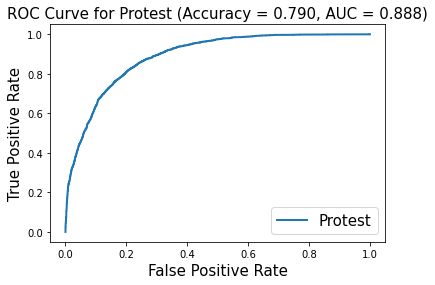

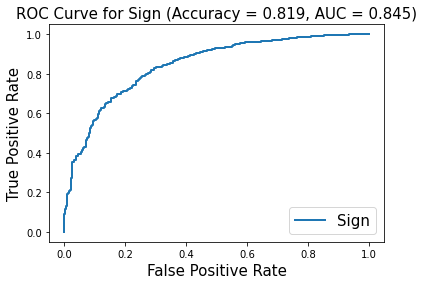

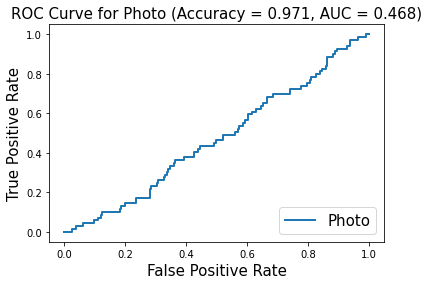

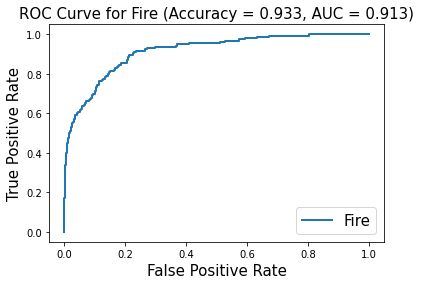

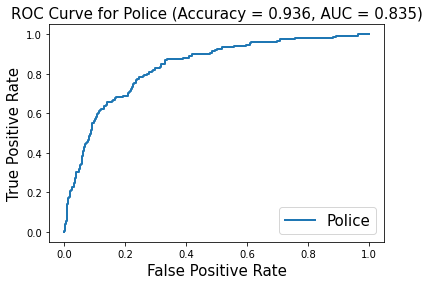

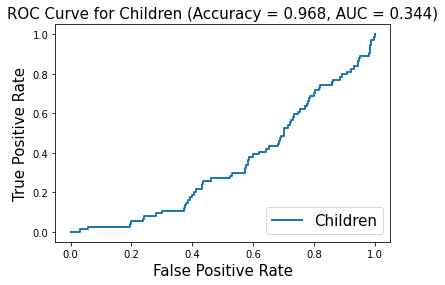

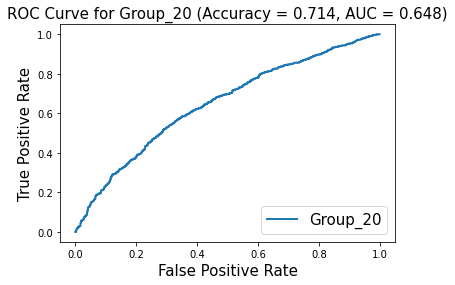

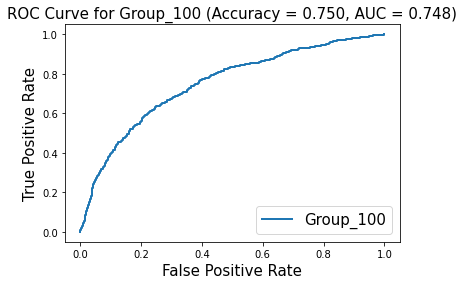

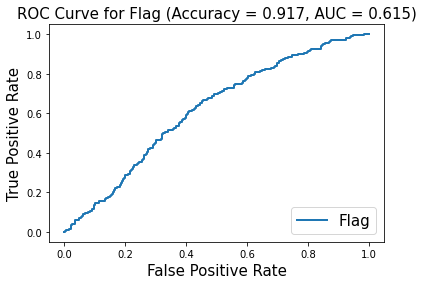

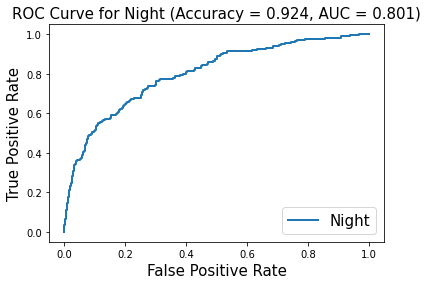

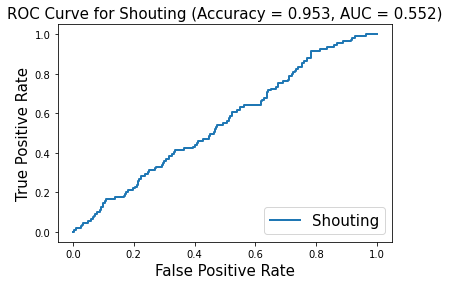

In [9]:
#Method 1
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

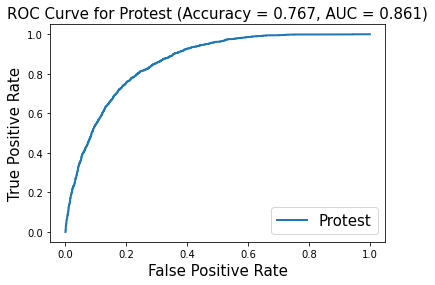

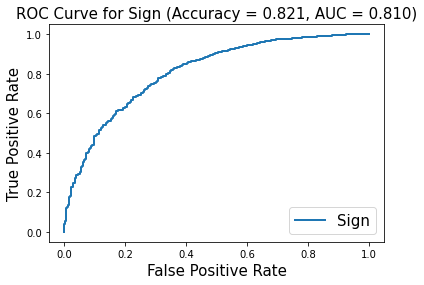

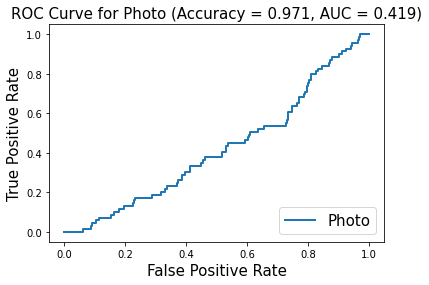

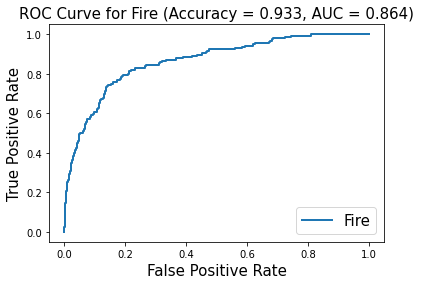

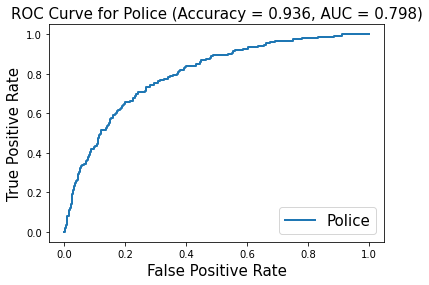

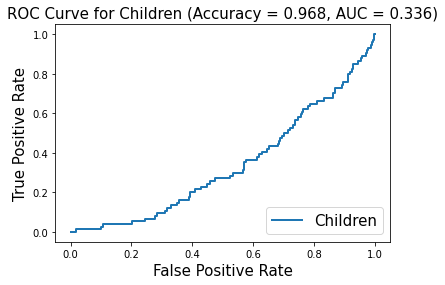

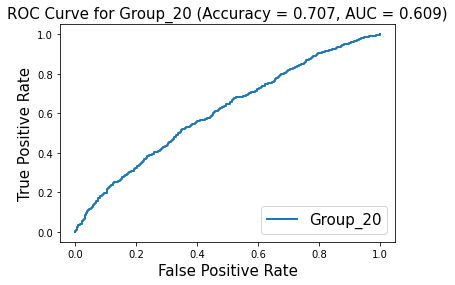

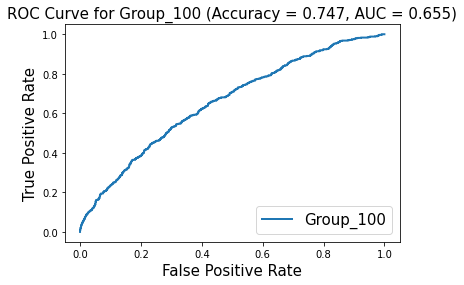

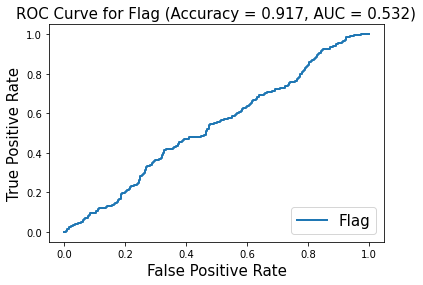

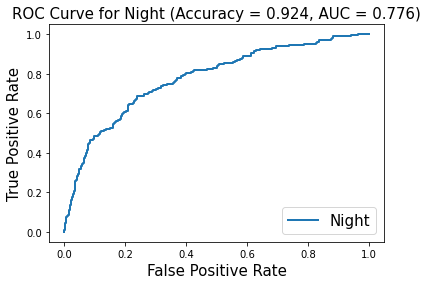

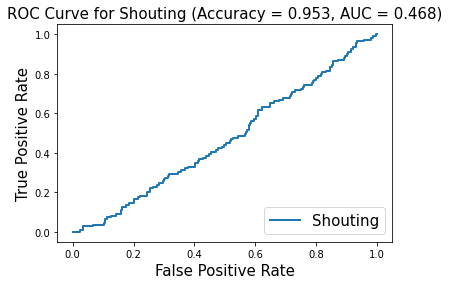

In [5]:
#Method 0
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

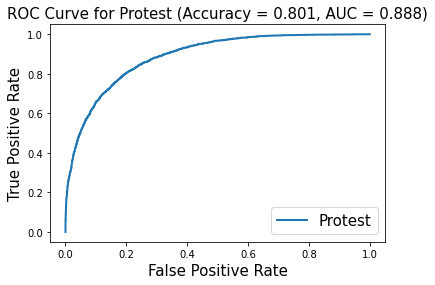

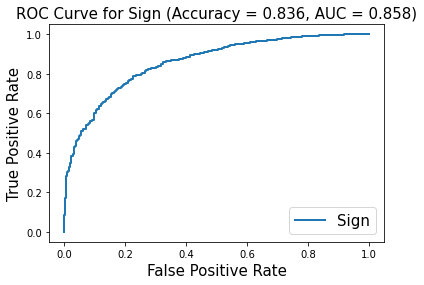

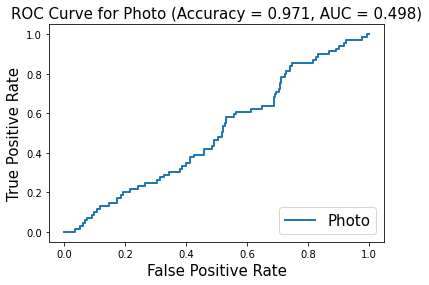

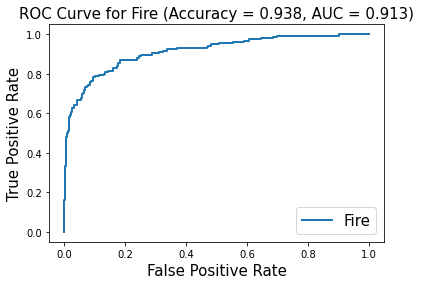

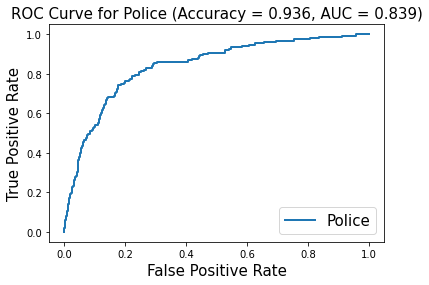

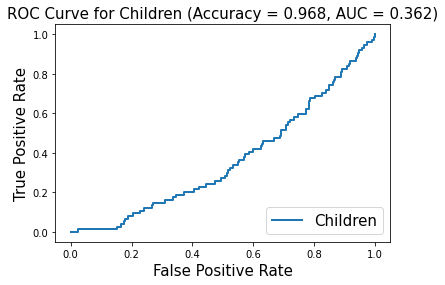

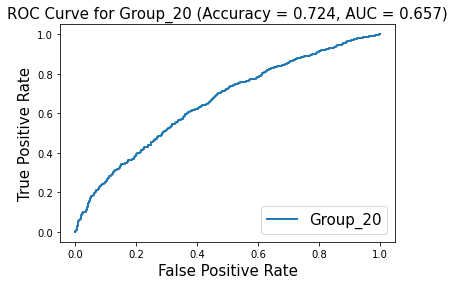

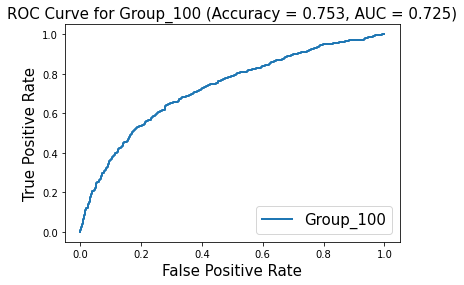

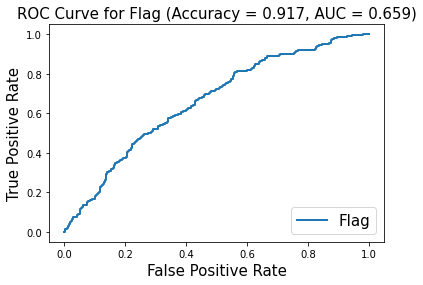

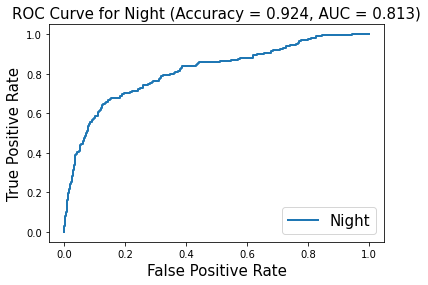

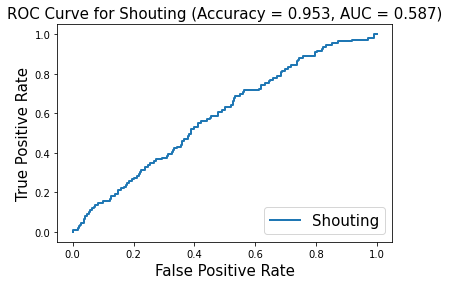

In [20]:
#Method 3
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

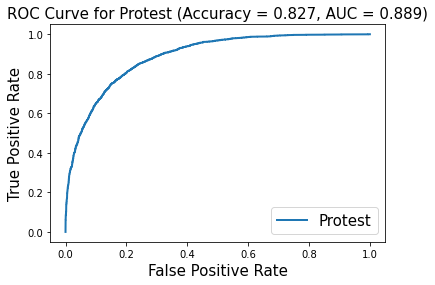

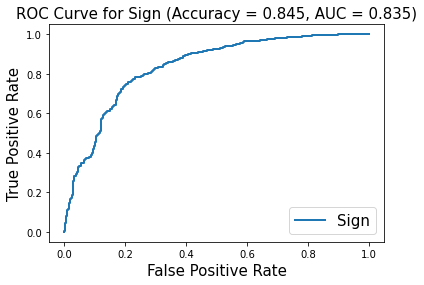

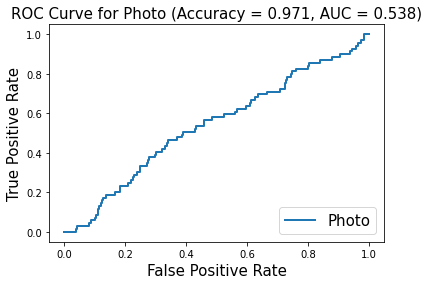

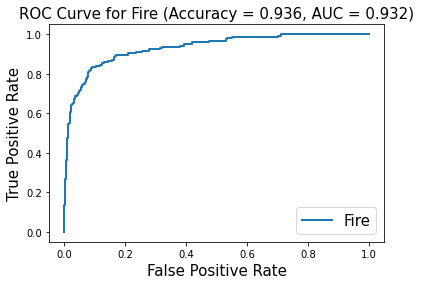

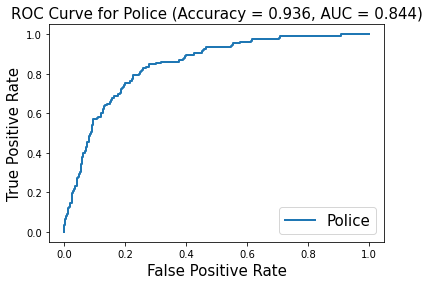

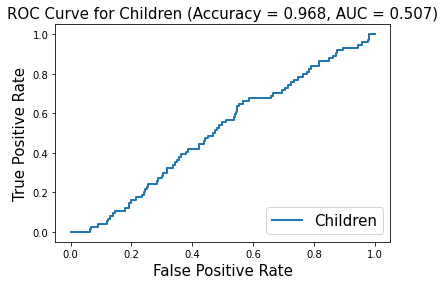

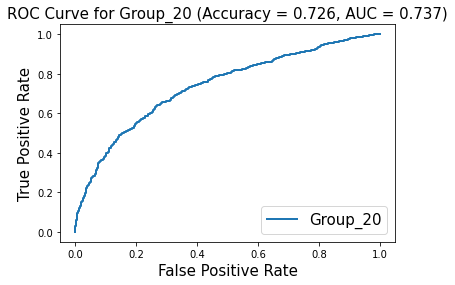

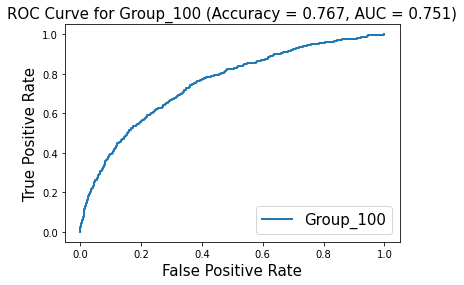

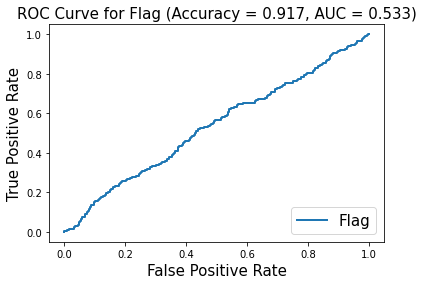

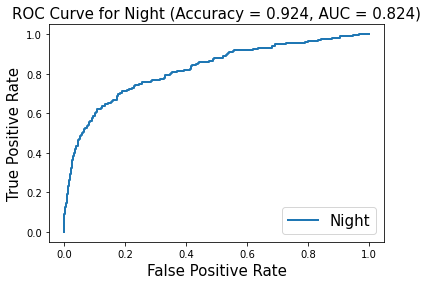

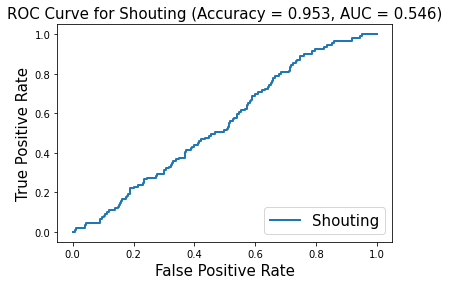

In [10]:
#Method 2
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

#### Violence

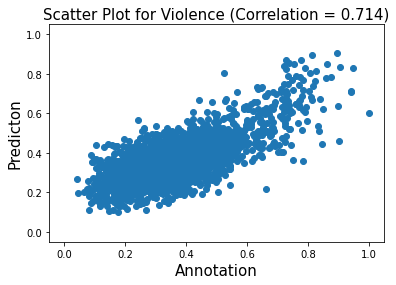

In [11]:
import scipy.stats as stats
attr = 'violence'
pred = df_pred[df_target['protest'] == 1][attr].tolist()
target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
fig, ax = plt.subplots()
plt.scatter(target, pred, label = attr.title())
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(target, pred)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = attr.title(), corr= corr)), fontsize = 15)
plt.show()
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))